In [1]:
import numpy as np
import pandas as pd

In [2]:
df_perm = {}

for i in range(1, 23):
    df_perm[i] = pd.read_csv(f"{i}_permutation_data.tsv", sep="\t")

In [10]:
df_annotations = {}

for i in range(1, 23):
    df_annotations[i] = pd.read_csv(f"{i}permutationready.tsv", sep="\t")
    
    
# do for all chromosomes
df_noheader = {}
np_df = {}
location_vec = {}
annotation_matrix = {}
a_matrix = {}

for i in range(1,23):
    df_noheader[i] = df_annotations[i].copy()
    np_df[i] = df_noheader[i].to_numpy()
    location_vec[i] = np_df[i][::,1]
    annotation_matrix[i] = np_df[i][::,2:]
    a_matrix[i] = annotation_matrix[i].transpose()
    
# calculate original number of sign SNPs in each annotation

original_number = {}

for i in range(1,23):
    original_number[i] = np.matmul(a_matrix[i],location_vec[i])

In [11]:
annotations = ['3_prime_UTR_variant','5_prime_UTR_variant','NMD_transcript_variant','coding_sequence_variant','downstream_gene_variant','incomplete_terminal_codon_variant','intergenic_variant','intron_variant','mature_miRNA_variant','missense_variant','non_coding_transcript_exon_variant','non_coding_transcript_variant','splice_acceptor_variant','splice_donor_variant','splice_region_variant','start_lost','stop_gained','stop_lost','stop_retained_variant','synonymous_variant','upstream_gene_variant']


In [12]:
df_data = {}

for i in range(1,23):
    df_data[i] = df_perm[i].to_numpy()

In [16]:
from collections import Counter

freq_matrix = {} # for all chromosomes

for i in range(1,23):
    
    freq_matrix[i] = {}

    for j in range(0,21):
            freq_matrix[i][j] = Counter(df_data[i][j,::]) 

In [24]:
original_number[2][11]

95.0

In [29]:
sorted(freq_matrix[2][11].items())

[(24.0, 1),
 (25.0, 1),
 (26.0, 3),
 (27.0, 4),
 (28.0, 7),
 (29.0, 5),
 (30.0, 8),
 (31.0, 8),
 (32.0, 15),
 (33.0, 14),
 (34.0, 14),
 (35.0, 23),
 (36.0, 39),
 (37.0, 39),
 (38.0, 49),
 (39.0, 48),
 (40.0, 77),
 (41.0, 79),
 (42.0, 108),
 (43.0, 100),
 (44.0, 145),
 (45.0, 136),
 (46.0, 152),
 (47.0, 174),
 (48.0, 183),
 (49.0, 202),
 (50.0, 232),
 (51.0, 229),
 (52.0, 250),
 (53.0, 264),
 (54.0, 237),
 (55.0, 272),
 (56.0, 268),
 (57.0, 284),
 (58.0, 272),
 (59.0, 290),
 (60.0, 285),
 (61.0, 280),
 (62.0, 273),
 (63.0, 269),
 (64.0, 271),
 (65.0, 285),
 (66.0, 275),
 (67.0, 292),
 (68.0, 233),
 (69.0, 255),
 (70.0, 206),
 (71.0, 239),
 (72.0, 188),
 (73.0, 206),
 (74.0, 189),
 (75.0, 186),
 (76.0, 171),
 (77.0, 143),
 (78.0, 166),
 (79.0, 155),
 (80.0, 99),
 (81.0, 110),
 (82.0, 112),
 (83.0, 95),
 (84.0, 88),
 (85.0, 78),
 (86.0, 85),
 (87.0, 61),
 (88.0, 66),
 (89.0, 54),
 (90.0, 60),
 (91.0, 53),
 (92.0, 48),
 (93.0, 32),
 (94.0, 31),
 (95.0, 24),
 (96.0, 18),
 (97.0, 17),
 (98.0

In [33]:
np.shape(df_data[1])

(21, 10000)

/tmp/ipykernel_24822/372707746.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


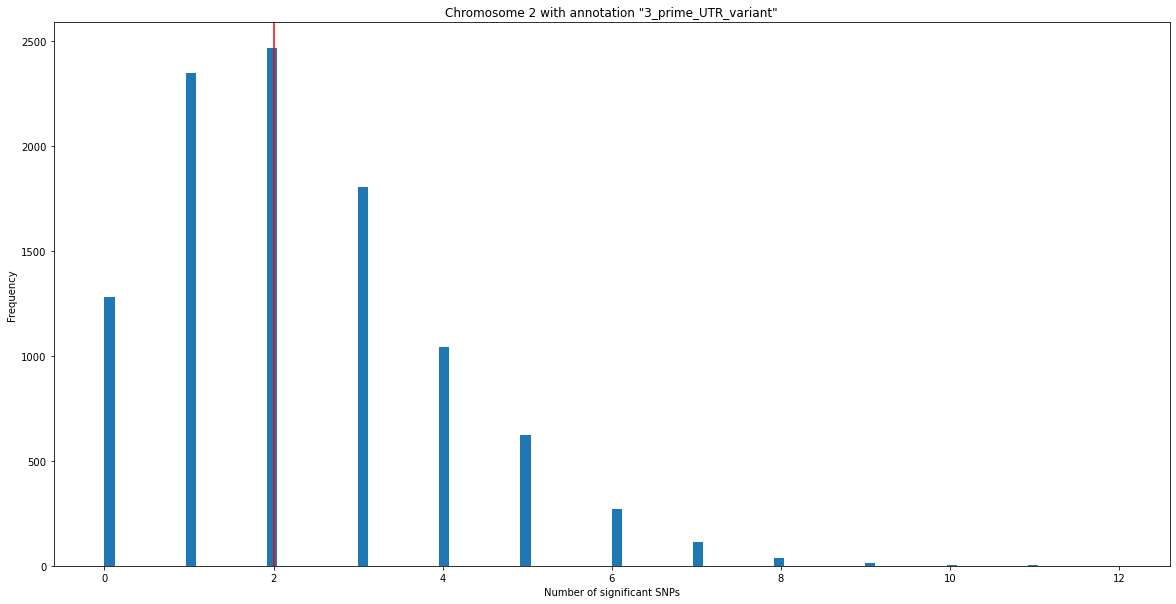

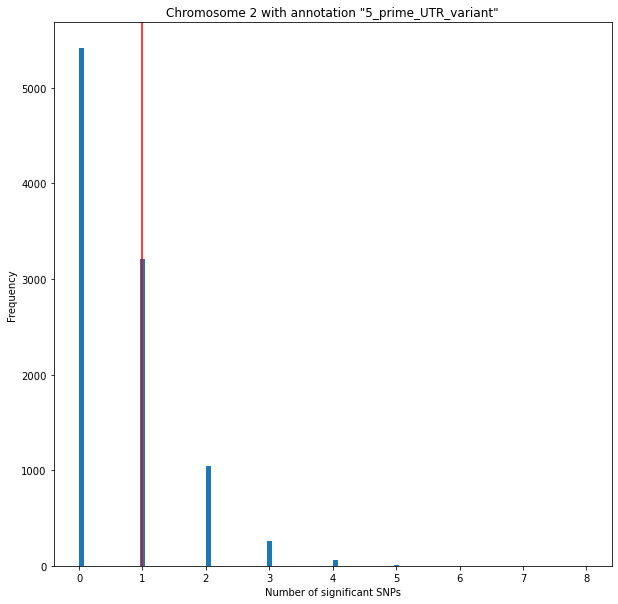

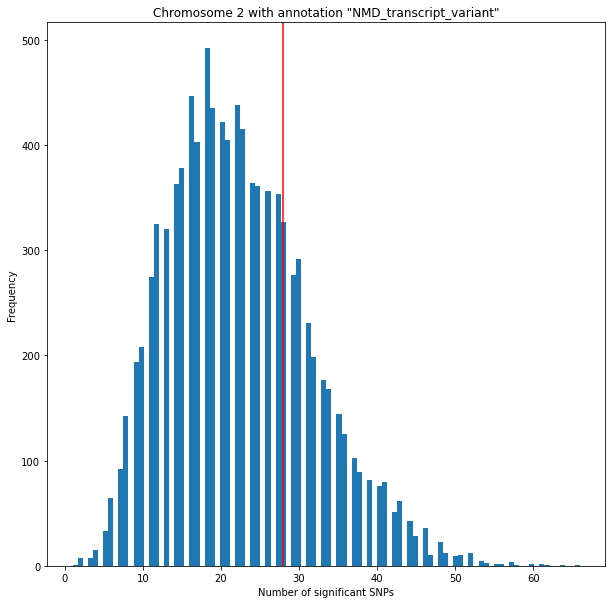

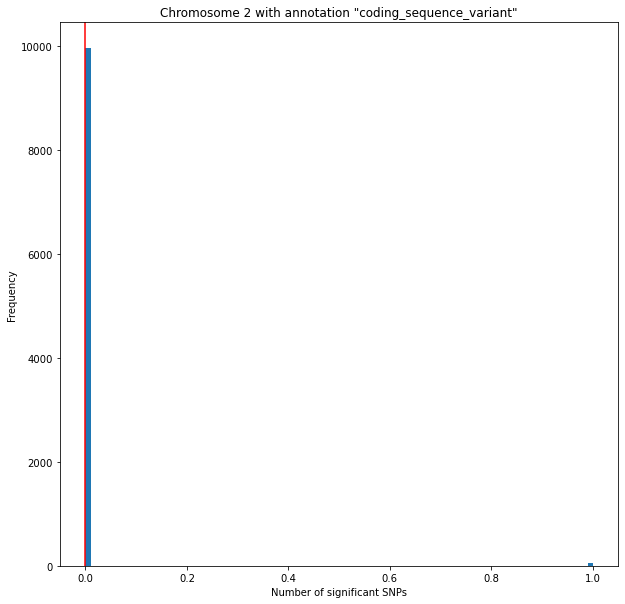

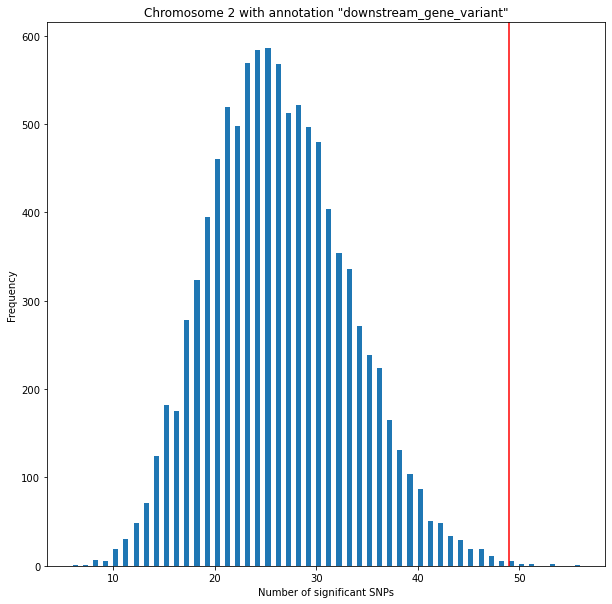

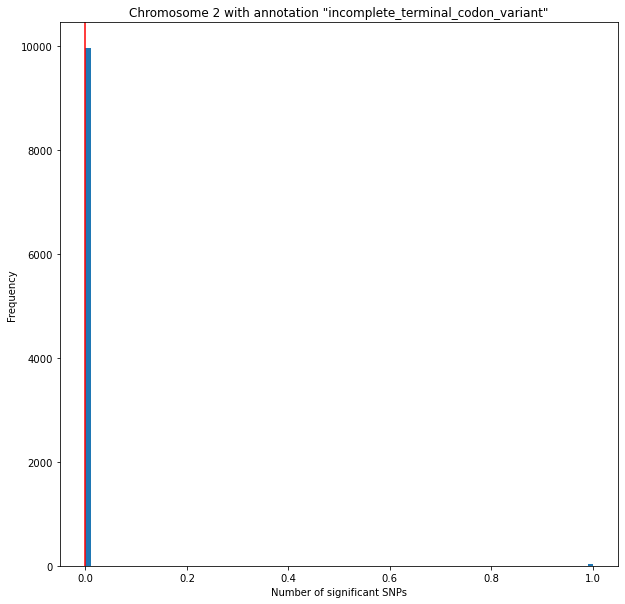

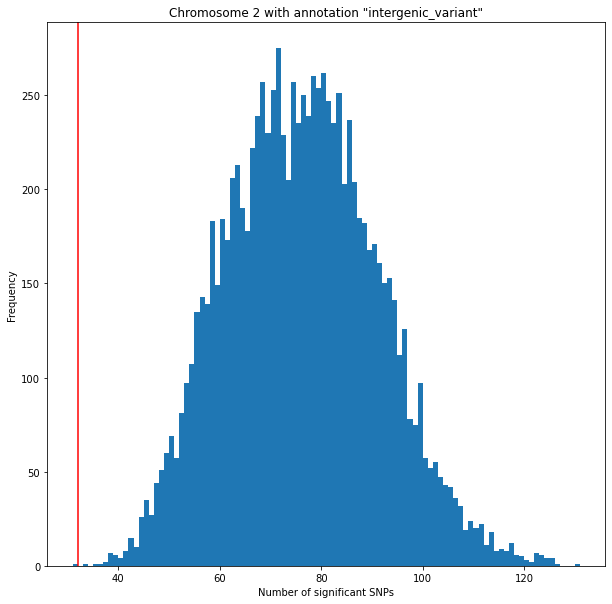

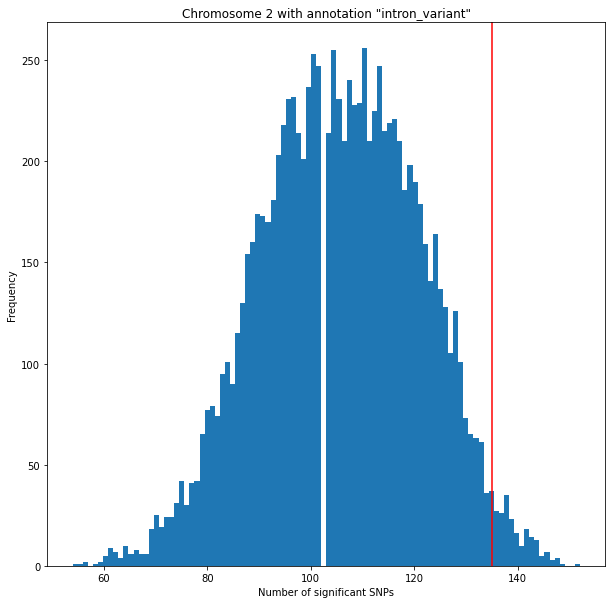

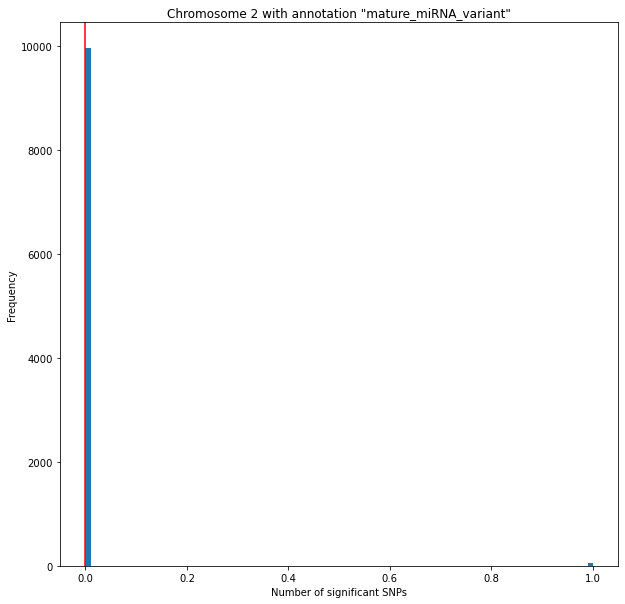

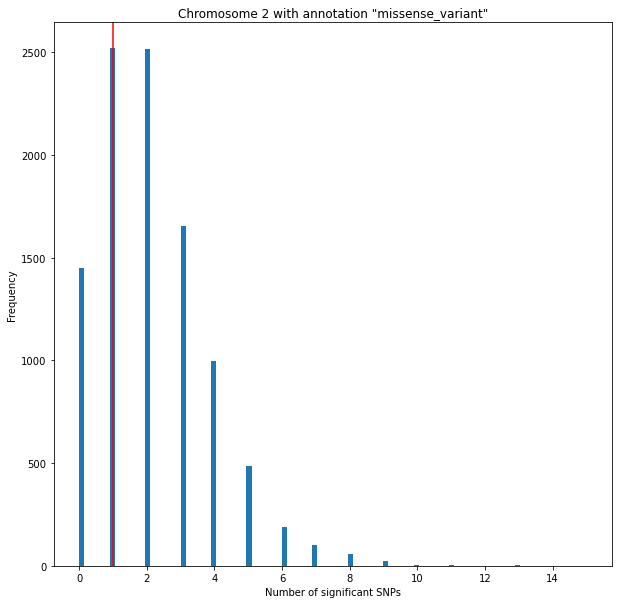

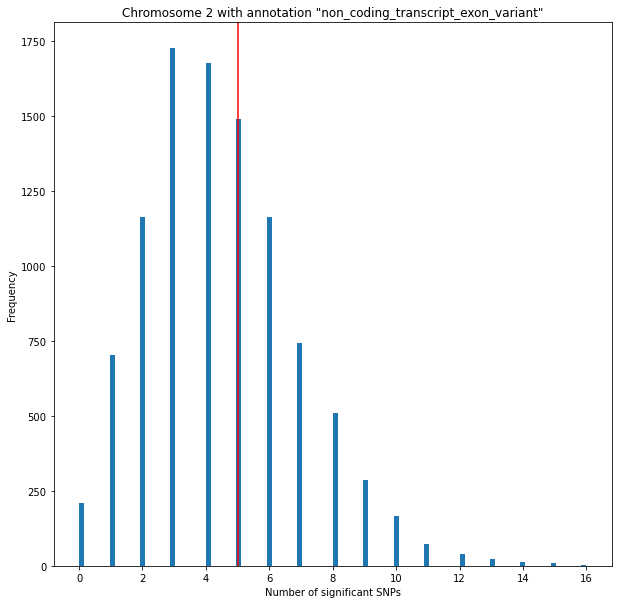

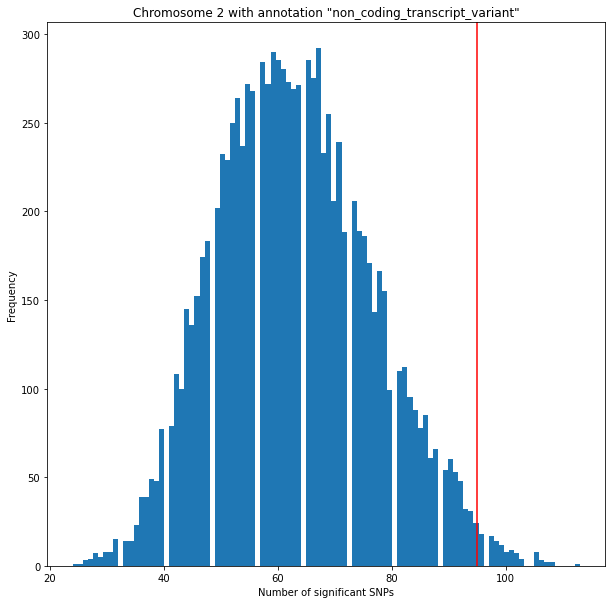

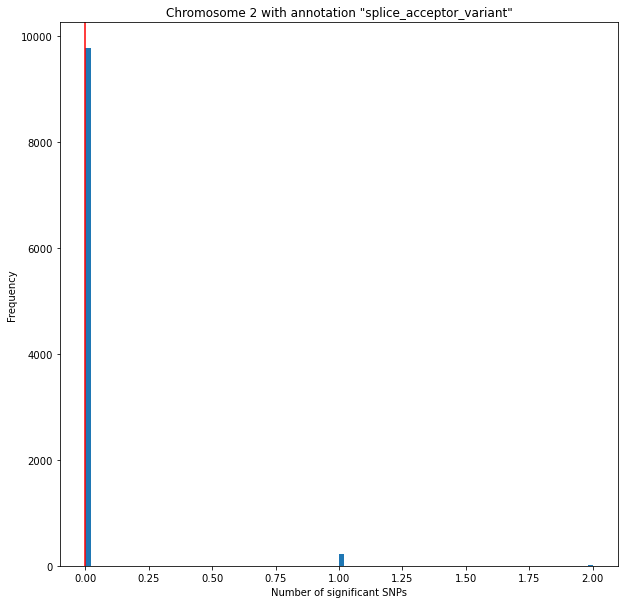

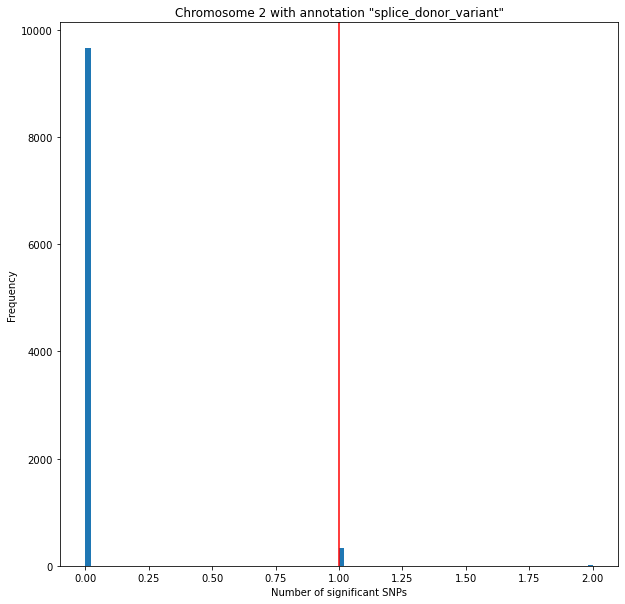

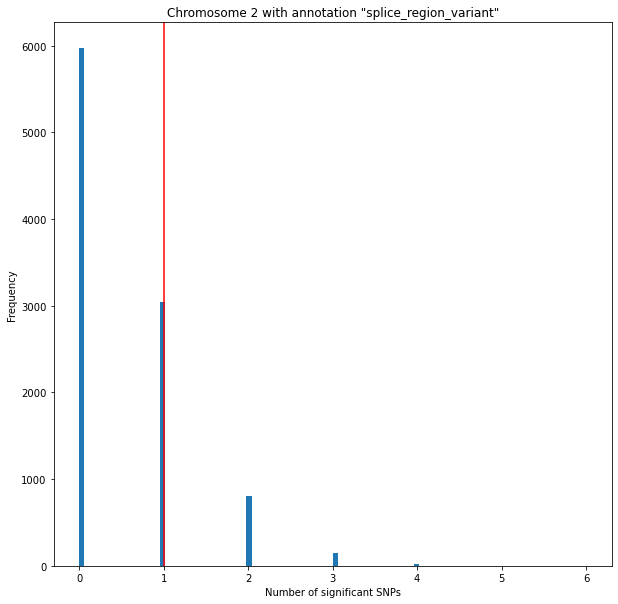

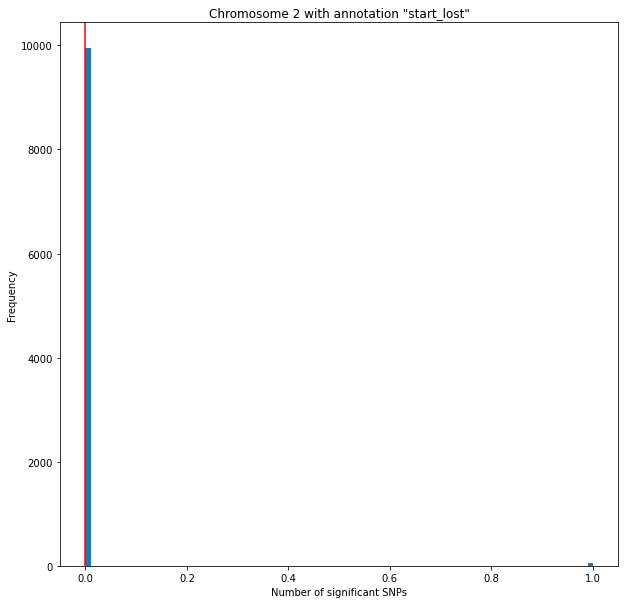

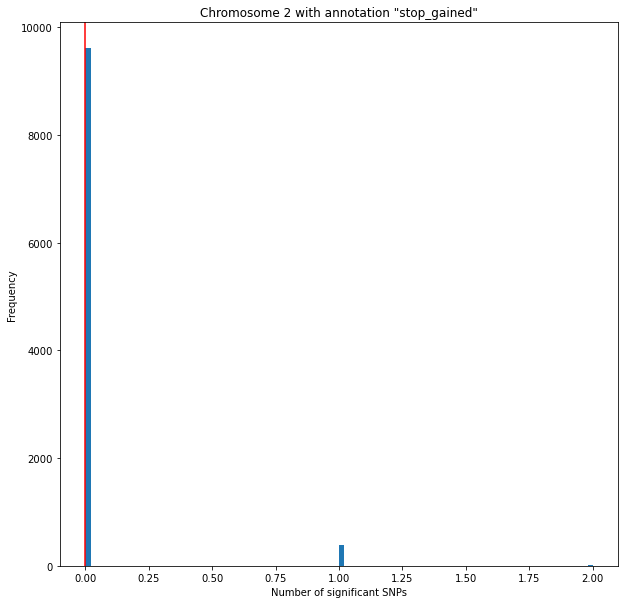

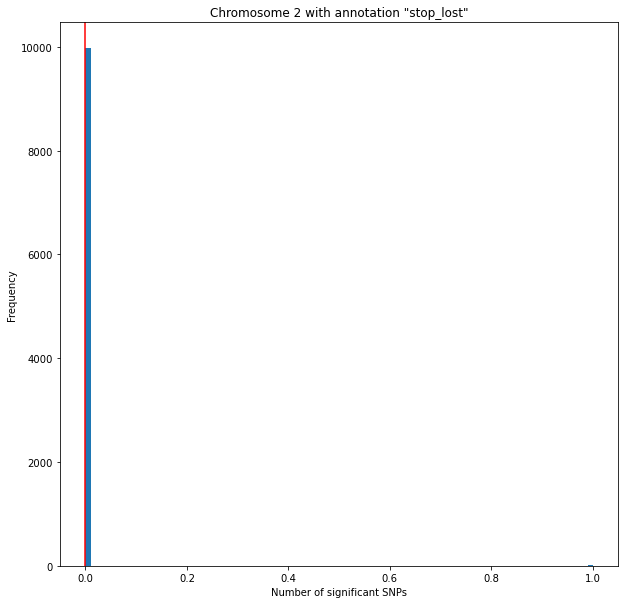

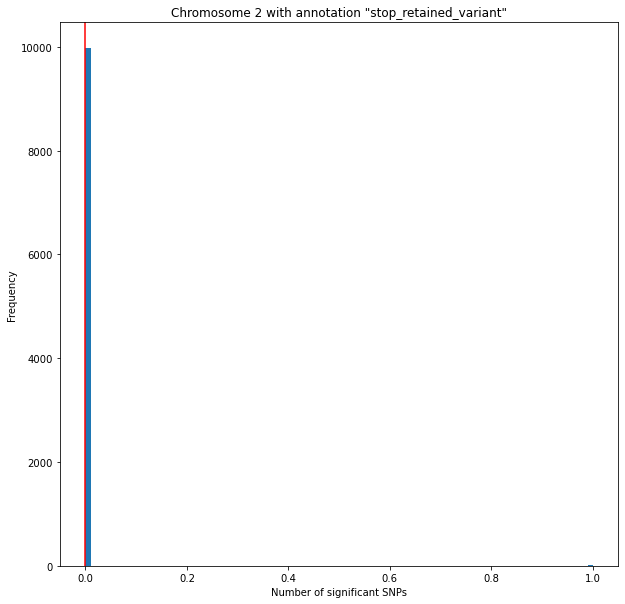

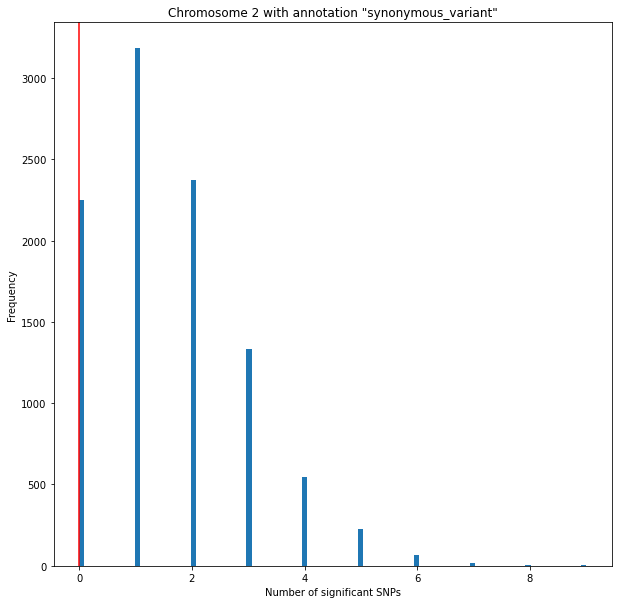

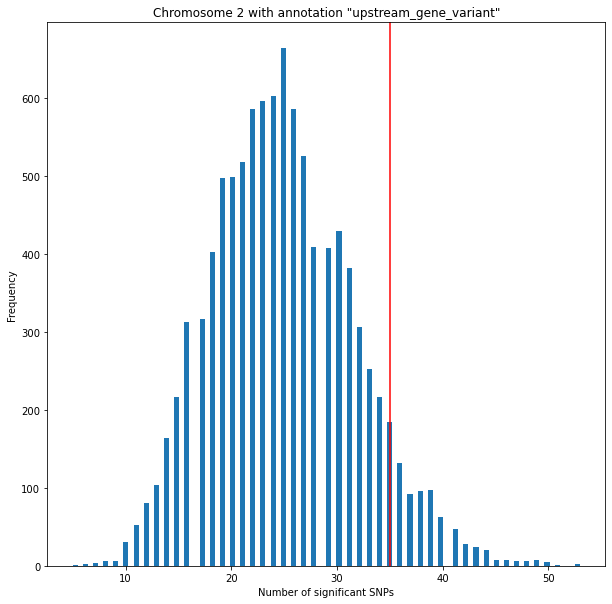

In [15]:
# graph the data
import matplotlib.pyplot as plt
# for chromosome i, annotation k:
# distribution_matrix[i][k,::] is the values of how many sign SNPs are in that annotation
i = 2
for k in range(0,21):
    plt.figure()
    plt.hist(df_data[i][k,::], bins=100)
    plt.gca().set(title='Transcript count Histogram', ylabel='Frequency', xlabel='Number of significant SNPs')
    plt.rcParams['figure.figsize'] = [10, 10]
    plt.axvline(x=original_number[i][k], color='r', label= 'observed number' )
    plt.title('Chromosome ' + str(i) + ' with annotation "' + annotations[k] +'"')
